In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
df1 = pd.read_csv('temp_datalab_records_social_facebook.csv')

C:\Users\luhf0\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
df1.head(3)

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN


Change time to pandas date time format

In [167]:
df1['date_updated_dt'] = pd.to_datetime(df1.date_updated)
df1['time_dt'] = pd.to_datetime(df1.time)

In [112]:
df1.columns

Index(['dataset_id', 'time', 'username', 'checkins', 'has_added_app',
       'were_here_count', 'likes', 'talking_about_count', 'facebook_id',
       'date_added', 'date_updated', 'entity_id', 'cusip', 'isin',
       'date_updated_dt', 'time_dt'],
      dtype='object')

In [5]:
df1.shape

(3621391, 14)

Now looking at the username and facebook_id, because number of facebook_id is less than the number of username

In [56]:
usernames_unique = df1.username.unique()
usernames_unique.shape

(4951,)

In [48]:
usernames_unique[:10]

array(['SodaStream', 'ANSYSInc', 'MyAquaAmerica', 'Qualcomm',
       'eaglepharmaceuticals', 'BioDeliverySI', 'UMBBank', 'Silicom',
       'GSK', 'OfficeDepot'], dtype=object)

In [49]:
facebook_ids_unique = df1.facebook_id.unique()
facebook_ids_unique.shape

(4714,)

get the usernames that has the same facebook_id, it turns out that some companies use more than two username, so when grouping we should use facebook_id other than username

In [59]:
df1_group_level1 = df1[['username', 'facebook_id']].groupby(['username', 'facebook_id']).count().reset_index(drop=False)
df1_group_level2 = df1_group_level1.groupby(['facebook_id']).count()

In [75]:
df1_group_level2[df1_group_level2['username'] >= 2].index

Int64Index([      5634829153,       6806028948,       6860957425,
                  6877151199,       7635872524,       8741241286,
                  8966519227,       9812439851,      10628463469,
                 10913332166,
            ...
            1005472326214672, 1035766253175524, 1228381697178228,
            1376049245973067, 1426042137634970, 1472083359719164,
            1590541251248554, 1675939302681774, 1680600785542457,
            1720606464838869],
           dtype='int64', name='facebook_id', length=340)

Insanity check: none of the companies used more than two different facebook_id

In [130]:
df1_group_level2_reverse = df1_group_level1.groupby(['username']).count()

In [131]:
df1_group_level2_reverse[df1_group_level2_reverse['facebook_id'] >= 2].index

Index([], dtype='object', name='username')

In [77]:
df1_group_level1[df1_group_level1['facebook_id'] == df1_group_level2[df1_group_level2['username'] >= 2].index[334]]

,username,facebook_id
1642,MYOSCorporation,1426042137634970
1643,MYOSRENSTechnology,1426042137634970


column 'has_added_app' is useless, because it's the same value through and through

In [46]:
df1.has_added_app.unique()

array(['f'], dtype=object)

the columns 'entity_id', 'cusip', 'isin' are empty columns

In [35]:
df1[['entity_id']].dropna()

,entity_id


In [38]:
df1[['cusip']].dropna()

,cusip


In [39]:
df1[['isin']].dropna()

,isin


The useful columns are checkins, were_here_count, likes, talking_about_count

Text(0.5, 1.0, 'talking_about_count')

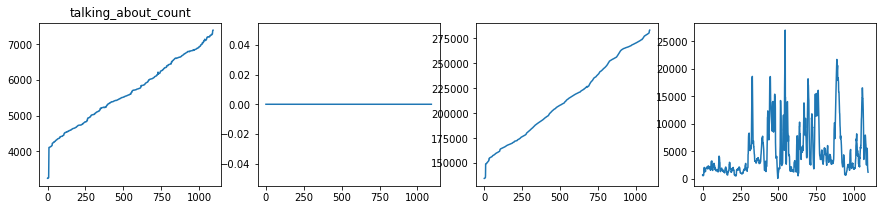

In [93]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

comp_name = 'GSK'
axes[0].plot(df1[df1['username'] == comp_name].reset_index(drop=True).checkins)
axes[0].set_title('checkins')
axes[1].plot(df1[df1['username'] == comp_name].reset_index(drop=True).were_here_count)
axes[0].set_title('were_here_count')
axes[2].plot(df1[df1['username'] == comp_name].reset_index(drop=True).likes)
axes[0].set_title('likes')
axes[3].plot(df1[df1['username'] == comp_name].reset_index(drop=True).talking_about_count)
axes[0].set_title('talking_about_count')

# Analysis of likes

In [149]:
df1_likes_grouped = df1[['facebook_id', 'likes']].groupby(['facebook_id']).agg(lambda x: x.max() - x.min()).reset_index()

In [150]:
df1_likes_grouped.sort_values(by='likes', ascending=False).head(10)

,facebook_id,likes
287,20531316728,46823180
4262,475822799216240,33522967
93,7558451780,19310026
4710,10150097174480584,17256164
611,50245567013,17226714
79,7175346442,15223709
319,22707976849,14285363
34,6243987495,13778512
78,7144906559,12196624
210,13652355666,11513355


In [151]:
# get top ten liked facebook id
top_10_facebookids = df1_likes_grouped.sort_values(by='likes', ascending=False).head(10).facebook_id
top_10_facebookids

287           20531316728
4262      475822799216240
93             7558451780
4710    10150097174480584
611           50245567013
79             7175346442
319           22707976849
34             6243987495
78             7144906559
210           13652355666
Name: facebook_id, dtype: int64

In [158]:
top_10_likes_complex = df1_group_level1[df1_group_level1['facebook_id'].isin(top_10_facebookids)] \
    .merge(df1_likes_grouped, 
           how='left', on='facebook_id') \
    .sort_values(by='likes', ascending=False).reset_index(drop=True)
top_10_likes_complex

,username,facebook_id,likes
0,facebook,20531316728,46823180
1,netflix,475822799216240,33522967
2,orange,7558451780,19310026
3,McDonalds,10150097174480584,17256164
4,McDonaldsUS,50245567013,17226714
5,wwe,7175346442,15223709
6,Intel,22707976849,14285363
7,Spotify,6243987495,13778512
8,KFC,7144906559,12196624
9,usatoday,13652355666,11513355


In [159]:
df1.loc[df1['facebook_id'] == top_10_likes_complex.loc[0, 'facebook_id']].head(1)

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin,date_updated_dt,time_dt
92761,56196,2015-07-21 04:00:00+00,facebook,12,f,0,163817897,318998,20531316728,NaN,2017-02-14 08:51:20.348641+00,NaN,NaN,NaN,2017-02-14 08:51:20.348641+00:00,2015-07-21 04:00:00+00:00


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text xticklabel objects>)

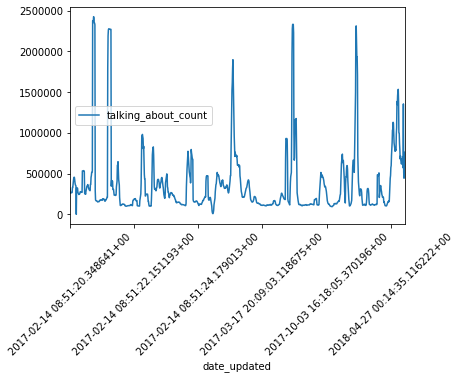

In [279]:
df1.loc[df1['facebook_id'] == top_10_likes_complex.loc[0, 'facebook_id'], ['talking_about_count', 'date_updated']].plot(x='date_updated', y='talking_about_count')
plt.xticks(rotation=45)

## Facebook Analysis

Text(0.5, 1.0, 'facebook')

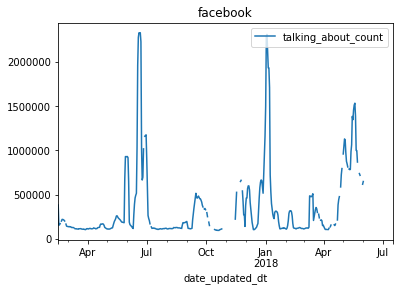

In [191]:
ranking = 0
df1.loc[df1['facebook_id'] == top_10_likes_complex.loc[ranking, 'facebook_id'],
        ['talking_about_count', 'date_updated_dt']]\
    .groupby(pd.Grouper(key='date_updated_dt', freq='D')).mean().plot()
plt.legend(loc='upper right')
plt.title(top_10_likes_complex.loc[ranking, 'username'])

In [192]:
fb_averaged = df1.loc[df1['facebook_id'] == top_10_likes_complex.loc[ranking, 'facebook_id'],
        ['talking_about_count', 'date_updated_dt']]\
    .groupby(pd.Grouper(key='date_updated_dt', freq='D')).mean().reset_index()

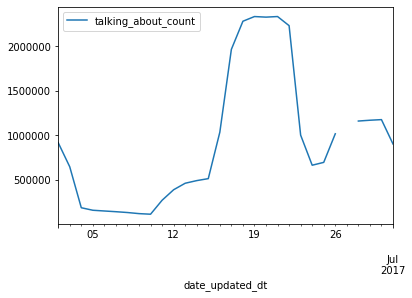

In [193]:
start_date = pd.to_datetime('2017-06-01 00:00:00+00')
end_date = pd.to_datetime('2017-07-01 00:00:00+00')
fb_averaged[(fb_averaged['date_updated_dt'] > start_date) 
            & (fb_averaged['date_updated_dt'] <= end_date)]\
    .plot(x='date_updated_dt', y='talking_about_count')

In [194]:
start_date = pd.to_datetime('2017-06-15 00:00:00+00')
end_date = pd.to_datetime('2017-06-25 00:00:00+00')
fb_averaged[(fb_averaged['date_updated_dt'] > start_date) & (fb_averaged['date_updated_dt'] <= end_date)]

,date_updated_dt,talking_about_count
122,2017-06-16 00:00:00+00:00,1035168.0
123,2017-06-17 00:00:00+00:00,1964342.0
124,2017-06-18 00:00:00+00:00,2279772.0
125,2017-06-19 00:00:00+00:00,2332271.0
126,2017-06-20 00:00:00+00:00,2325757.0
127,2017-06-21 00:00:00+00:00,2332423.0
128,2017-06-22 00:00:00+00:00,2230194.0
129,2017-06-23 00:00:00+00:00,1002528.0
130,2017-06-24 00:00:00+00:00,665023.0
131,2017-06-25 00:00:00+00:00,696948.0


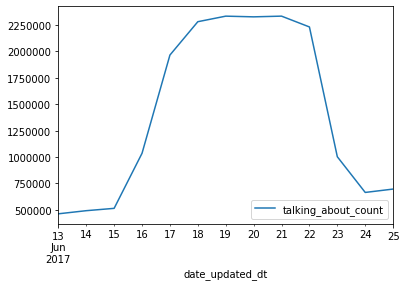

In [195]:
start_date = pd.to_datetime('2017-06-12 00:00:00+00')
end_date = pd.to_datetime('2017-06-25 00:00:00+00')
fb_averaged[(fb_averaged['date_updated_dt'] > start_date) 
            & (fb_averaged['date_updated_dt'] <= end_date)]\
    .plot(x='date_updated_dt', y='talking_about_count')

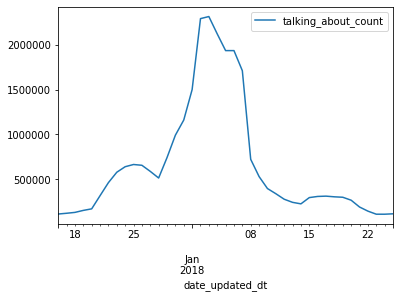

In [196]:
start_date = pd.to_datetime('2017-12-15 00:00:00+00')
end_date = pd.to_datetime('2018-01-25 00:00:00+00')
fb_averaged[(fb_averaged['date_updated_dt'] > start_date) 
            & (fb_averaged['date_updated_dt'] <= end_date)]\
    .plot(x='date_updated_dt', y='talking_about_count')

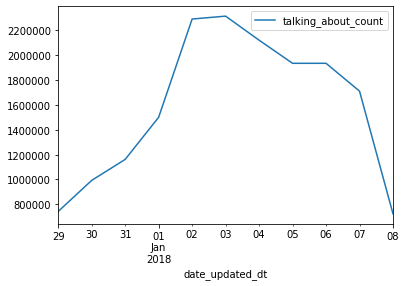

In [197]:
start_date = pd.to_datetime('2017-12-28 00:00:00+00')
end_date = pd.to_datetime('2018-01-08 00:00:00+00')
fb_averaged[(fb_averaged['date_updated_dt'] > start_date) 
            & (fb_averaged['date_updated_dt'] <= end_date)]\
    .plot(x='date_updated_dt', y='talking_about_count')

[None, None, None, None, None, None, None, None, None, None, None, None]

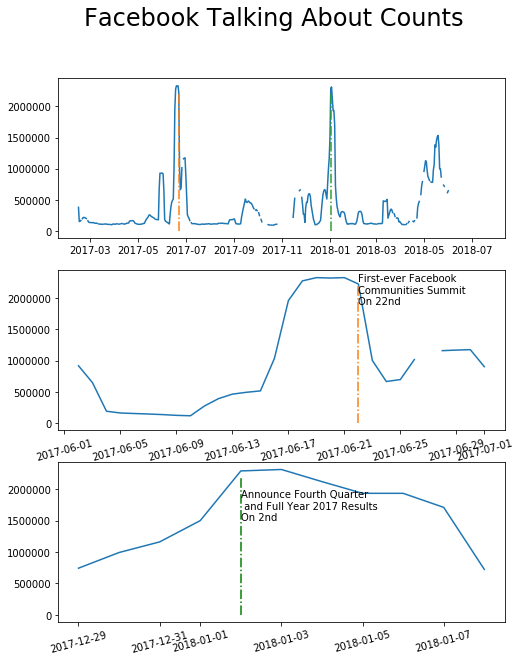

In [262]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle('Facebook Talking About Counts', fontsize=24)

ranking = 0
t1 = df1.loc[df1['facebook_id'] == top_10_likes_complex.loc[ranking, 'facebook_id'],
        ['talking_about_count', 'date_updated_dt']]\
    .groupby(pd.Grouper(key='date_updated_dt', freq='D')).mean().reset_index()
axes[0].plot(t1['date_updated_dt'], t1['talking_about_count'])
axes[0].plot([pd.to_datetime('2017-06-22 00:00:00+00'), pd.to_datetime('2017-06-22 00:00:00+00')], [0, 2200000], '-.')
axes[0].plot([pd.to_datetime('2018-01-02 00:00:00+00'), pd.to_datetime('2018-01-02 00:00:00+00')], [0, 2200000], '-.')

start_date = pd.to_datetime('2017-06-01 00:00:00+00')
end_date = pd.to_datetime('2017-07-01 00:00:00+00')
t2 = fb_averaged[(fb_averaged['date_updated_dt'] > start_date) 
                 & (fb_averaged['date_updated_dt'] <= end_date)]
axes[1].plot(t2['date_updated_dt'], t2['talking_about_count'])
axes[1].text(pd.to_datetime('2017-06-22 00:00:00+00'), 1900000, 'First-ever Facebook \nCommunities Summit\nOn 22nd')
axes[1].plot([pd.to_datetime('2017-06-22 00:00:00+00'), pd.to_datetime('2017-06-22 00:00:00+00')], [0, 2200000], '-.')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=15)

start_date = pd.to_datetime('2017-12-28 00:00:00+00')
end_date = pd.to_datetime('2018-01-08 00:00:00+00')
t3 = fb_averaged[(fb_averaged['date_updated_dt'] > start_date) 
                 & (fb_averaged['date_updated_dt'] <= end_date)]
axes[2].plot(t3['date_updated_dt'], t3['talking_about_count'])
axes[2].text(pd.to_datetime('2018-01-02 00:00:00+00'), 1500000, 'Announce Fourth Quarter\n and Full Year 2017 Results\nOn 2nd')
axes[2].plot([pd.to_datetime('2018-01-02 00:00:00+00'), pd.to_datetime('2018-01-02 00:00:00+00')], [0, 2200000], '-.g')
plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=15)

## Netflix Analysis

Text(0.5, 1.0, 'netflix')

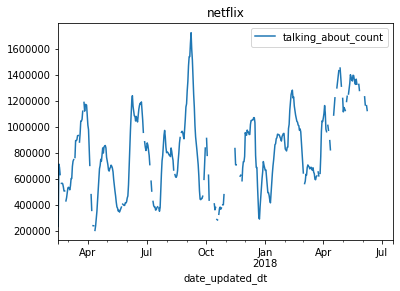

In [198]:
ranking = 1
df1.loc[df1['facebook_id'] == top_10_likes_complex.loc[ranking, 'facebook_id'],
        ['talking_about_count', 'date_updated_dt']]\
    .groupby(pd.Grouper(key='date_updated_dt', freq='D')).mean().plot()
plt.legend(loc='upper right')
plt.title(top_10_likes_complex.loc[ranking, 'username'])

## Orange Analysis

Text(0.5, 1.0, 'orange')

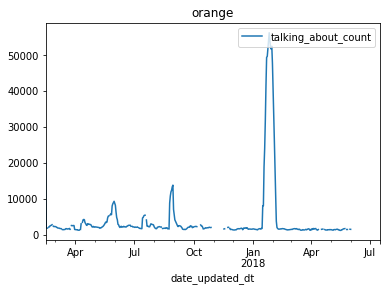

In [199]:
ranking = 2
df1.loc[df1['facebook_id'] == top_10_likes_complex.loc[ranking, 'facebook_id'],
        ['talking_about_count', 'date_updated_dt']]\
    .groupby(pd.Grouper(key='date_updated_dt', freq='D')).mean().plot()
plt.legend(loc='upper right')
plt.title(top_10_likes_complex.loc[ranking, 'username'])

## McDonalds Analysis

Text(0.5, 1.0, 'McDonalds')

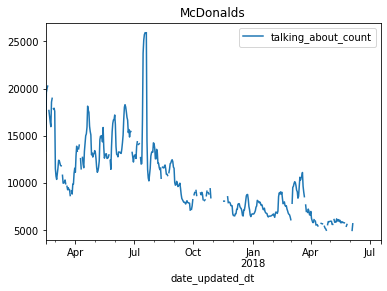

In [200]:
ranking = 3
df1.loc[df1['facebook_id'] == top_10_likes_complex.loc[ranking, 'facebook_id'],
        ['talking_about_count', 'date_updated_dt']]\
    .groupby(pd.Grouper(key='date_updated_dt', freq='D')).mean().plot()
plt.legend(loc='upper right')
plt.title(top_10_likes_complex.loc[ranking, 'username'])

Text(0.5, 1.0, 'McDonaldsUS')

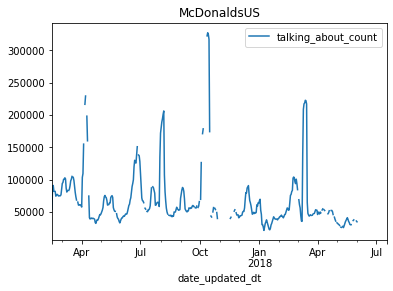

In [201]:
ranking = 4
df1.loc[df1['facebook_id'] == top_10_likes_complex.loc[ranking, 'facebook_id'],
        ['talking_about_count', 'date_updated_dt']]\
    .groupby(pd.Grouper(key='date_updated_dt', freq='D')).mean().plot()
plt.legend(loc='upper right')
plt.title(top_10_likes_complex.loc[ranking, 'username'])

# Checkins analysis

In [202]:
df1_checkins_grouped = df1[['facebook_id', 'checkins']].groupby(['facebook_id']).agg(lambda x: x.max() - x.min()).reset_index()

In [204]:
df1_checkins_grouped.sort_values(by='checkins', ascending=False).head(10)

,facebook_id,checkins
184,11081890741,3129368
767,63617892564,2151865
801,68181225238,1505201
171,10286130875,1370477
379,28859306498,1087384
1569,155669083273,914188
180,10625691462,879488
2985,153817204635459,770434
1573,155893938367,698154
258,18543728314,629101


In [205]:
# top 20 checked in companies
top_10_checkedin_facebookids = df1_checkins_grouped.sort_values(by='checkins', ascending=False).head(20).facebook_id
top_10_checkedin_facebookids

184         11081890741
767         63617892564
801         68181225238
171         10286130875
379         28859306498
1569       155669083273
180         10625691462
2985    153817204635459
1573       155893938367
258         18543728314
3196    174288382762279
1619       167204015611
1078        95469803923
1903       291755292870
1032        91085023598
416         32237381874
9            5747398233
111          8010558663
1494       141980704741
373         28442453154
Name: facebook_id, dtype: int64

In [215]:
top_20_checkins_complex = df1_group_level1[df1_group_level1['facebook_id'].isin(top_10_checkedin_facebookids)] \
    .merge(df1_checkins_grouped, 
           how='inner', on='facebook_id') \
    .sort_values(by='checkins', ascending=False).reset_index(drop=True)\
    .drop_duplicates(subset ="facebook_id").reset_index(drop=True)
top_20_checkins_complex

,username,facebook_id,checkins
0,Disneyland,11081890741,3129368
1,SeaWorld,63617892564,2151865
2,BuschGardensTampa,68181225238,1505201
3,KnottsBerryFarm,10286130875,1370477
4,MadisonSquareGarden,28859306498,1087384
5,WaltDisneyWorld,155669083273,914188
6,cedarpoint,10625691462,879488
7,empirestatebuilding,153817204635459,770434
8,visitkingsisland,155893938367,698154
9,BuschGardens,18543728314,629101


Text(10, 2500000, 'Disney has 3 sites in top 20 tourist sites')

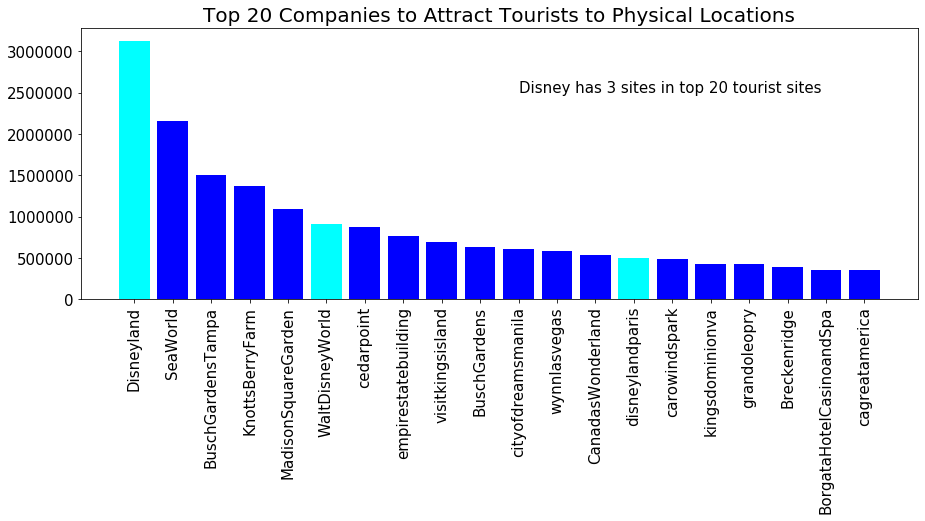

In [278]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
color = ['blue' for i in range(20)]
for i in [0, 5, 13]:
    color[i] = 'cyan'
ax.bar(top_20_checkins_complex['username'], top_20_checkins_complex['checkins'], color=color)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Top 20 Companies to Attract Tourists to Physical Locations', fontsize=20)
plt.text(10, 2500000, 'Disney has 3 sites in top 20 tourist sites', fontsize=15)